In [1]:
import numpy as np
import galstreams
import matplotlib.pyplot as plt
import astropy.coordinates as ac
import astropy.units as u
import pandas as pd

        Use @ instead. [gala.coordinates.sgr]
        Use @ instead. [gala.coordinates.orphan]
        Use @ instead. [gala.coordinates.magellanic_stream]


In [68]:
cluster = pd.read_csv("test2_copy.txt",delimiter="\t", skiprows=1, names=["Mass","x","y","z","vx","vy","vz"])

In [69]:
cluster

,Mass,x,y,z,vx,vy,vz
0,3.210500,0.311036,0.215894,0.576958,0.341285,0.557254,-0.520914
1,0.825082,-0.931923,-0.156944,0.043102,0.689113,-0.422161,0.714719
2,0.121758,-0.430466,0.198875,0.458881,-0.151438,-0.861908,0.682554
3,0.252938,-0.593855,0.355517,0.343683,-0.672470,0.614529,0.886378
4,0.093578,-0.101216,-0.285890,0.193496,-1.257257,0.599439,-0.368364
...,...,...,...,...,...,...,...
1506,0.081930,-0.539233,0.815496,-1.142160,0.103356,0.523681,-0.953521
1507,0.274591,-0.562808,-0.026289,0.407057,-0.437469,0.634912,1.535631
1508,0.986974,-1.653996,0.619695,-1.630078,-0.399296,0.174012,0.063481
1509,0.151110,-0.741401,0.173844,0.662415,0.122346,1.019256,-0.046791


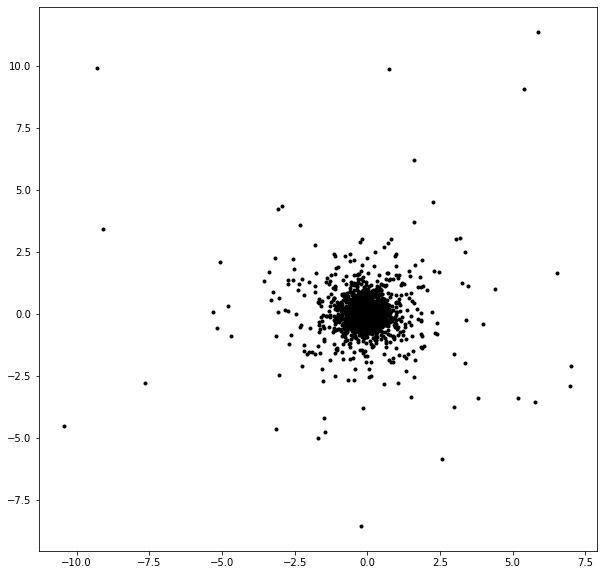

In [65]:
xpos = cluster['x']
ypos = cluster['y']

plt.figure(figsize=(10,10))
plt.scatter(xpos,ypos,c="black",linewidths=1,marker='.')
plt.show()

In [2]:
mws = galstreams.MWStreams(verbose=False, implement_Off=False, print_topcat_friendly_files=False)

Initializing galstreams library from master_log... 


        Use @ instead. [gala.coordinates.greatcircle]


In [19]:
mws.summary.keys()

Index(['Imp', 'On', 'TrackName', 'Name', 'TrackRefs', 'TrackRefsLatex',
       'Notes', 'length', 'ra_o', 'dec_o', 'distance_o', 'ra_f', 'dec_f',
       'distance_f', 'ra_mid', 'dec_mid', 'distance_mid', 'ra_pole',
       'dec_pole', 'InfoFlags', 'has_empirical_track', 'has_D', 'has_pm',
       'has_vrad', 'DiscoveryRefs', 'ID'],
      dtype='object')

In [4]:
for st in mws.all_track_names():
    if mws.summary.loc[st]["InfoFlags"] == "1111":
        print (st)

AAU-AliqaUma-L21
AAU-ATLAS-L21
Aquarius-W11
LMS1-Y20
Orphan-K19


In [21]:
mws["Pal5-PW19"].track

<SkyCoord (ICRS): (ra, dec, distance) in (deg, deg, kpc)
    [(242.09382437,  6.88309503, 22.02340828),
     (242.08670244,  6.87558676, 22.02333424),
     (242.07954494,  6.86813405, 22.02325892), ...,
     (224.67592037, -4.79218842, 19.09368606),
     (224.66687368, -4.79668187, 19.09096063),
     (224.65738999, -4.80051508, 19.08823394)]
 (pm_ra_cosdec, pm_dec, radial_velocity) in (mas / yr, mas / yr, km / s)
    [(-2.12850417, -2.34952027, 999.00002274),
     (-2.12922183, -2.34945636, 999.00002274),
     (-2.12993892, -2.34939303, 999.00002274), ...,
     (-2.77331871, -3.06772628, 999.00002188),
     (-2.77323034, -3.0684521 , 999.00002188),
     (-2.77314357, -3.06917651, 999.00002188)]>

In [20]:
mws.summary.loc["Pal5-PW19"]

Imp                                                 st
On                                                True
TrackName                                    Pal5-PW19
Name                                              Pal5
TrackRefs                              pricewhelan2019
TrackRefsLatex         PriceWhelan2019_pal5,Bonaca2020
Notes                                                -
length                                        21.38902
ra_o                                        242.093824
dec_o                                         6.883095
distance_o                                   22.023408
ra_f                                         224.65739
dec_f                                        -4.800515
distance_f                                   19.088234
ra_mid                                      229.005945
dec_mid                                      -0.105794
distance_mid                                 20.537974
ra_pole                                     319.205273
dec_pole  

In [18]:
st = "AAU-AliqaUma-L21"

mws[st].track.to_table()

ra,dec,distance,pm_ra_cosdec,pm_dec,radial_velocity
deg,deg,kpc,mas / yr,mas / yr,km / s
float64,float64,float64,float64,float64,float64
31.157871636098392,-32.87905256445056,25.60982328596275,0.1723710308173964,-0.7866165971108707,-55.48041623410119
31.167677748347707,-32.88492594237263,25.61427450392886,0.1724991245006597,-0.78638914863961,-55.42646020939663
31.177484625940306,-32.89079943564713,25.618727971376973,0.17262706343567166,-0.7861615404189453,-55.37249423352071
31.18729226932405,-32.896673044161055,25.623183688307094,0.1727548475710668,-0.7859337724834179,-55.31851830647342
31.197100678946935,-32.902546767801404,25.62764165471922,0.1728824768554699,-0.7857058448675938,-55.26453242825479
31.20690985525704,-32.90842060645506,25.632101870613347,0.17300995123749552,-0.7854777576060602,-55.21053659886478
...,...,...,...,...,...
40.82242480787443,-38.457192492957574,30.81300848786995,0.2169222598633802,-0.5064499346821039,-0.11670234527729564


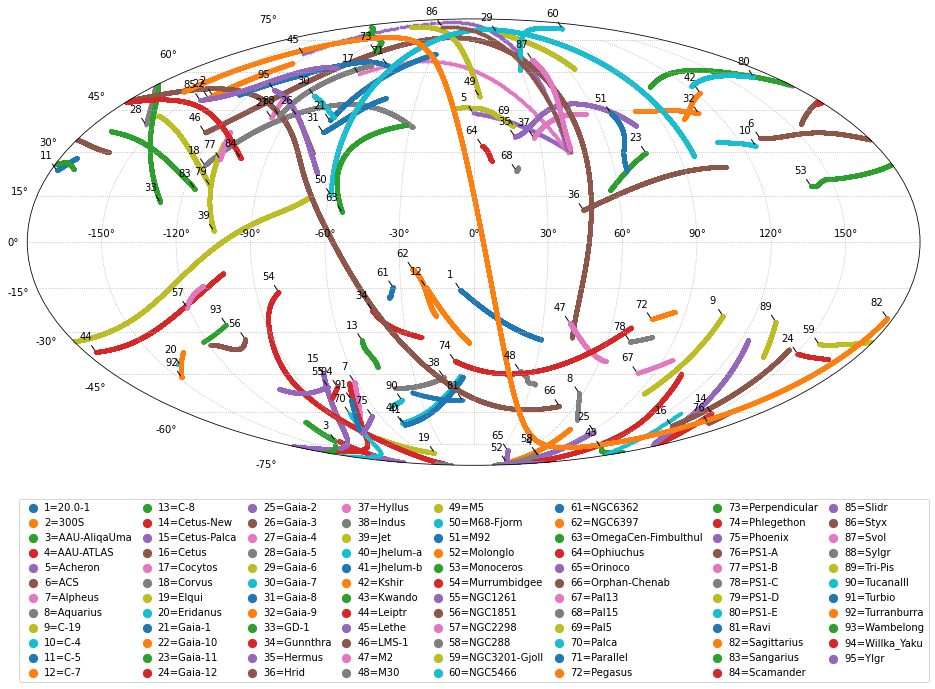

In [12]:
fig = plt.figure(1,figsize=(16,11))
ax = fig.add_subplot(111, projection='mollweide')

for st in mws.keys():
  #Plot the tracks  
    ax.scatter(mws[st].track.galactic.l.wrap_at(180*u.deg).rad, 
             mws[st].track.galactic.b.rad, marker='.', s=30,
             label="{ID:.0f}={Name}".format(ID=mws[st].ID,Name=mws[st].stream_name))
  #Annotate at one of the end points  
    xo = mws[st].end_points.galactic.l.wrap_at(180*u.deg)[0].rad
    yo = mws[st].end_points.galactic.b[0].rad  
    ax.annotate(mws[st].ID, xy=(xo,yo),
              xycoords='data',
              arrowprops=dict(arrowstyle="-",color='k'),
              horizontalalignment='center', verticalalignment='center', 
              xytext=(-10,15),textcoords='offset points',
              )

ax.legend(ncol=8,loc='center', columnspacing=0.5, handletextpad=0.1, 
          bbox_to_anchor=(0.5,-0.28), markerscale=3, fontsize='medium')
ax.grid(ls=':')



In [18]:
mws.all_track_names()

array(['20.0-1-M18', '300S-F18', 'AAU-AliqaUma-L21', 'AAU-ATLAS-L21',
       'ATLAS-I21', 'Acheron-G09', 'ACS-R21', 'Alpheus-G13',
       'Aquarius-W11', 'C-19-I21', 'C-4-I21', 'C-5-I21', 'C-7-I21',
       'C-8-I21', 'Cetus-New-Y21', 'Cetus-Palca-T21', 'Cetus-Palca-Y21',
       'Cetus-Y13', 'Cocytos-G09', 'Corvus-M18', 'Elqui-S19',
       'Eridanus-M17', 'Fimbulthul-I21', 'Gaia-1-I21', 'Gaia-10-I21',
       'Gaia-11-I21', 'Gaia-12-I21', 'Gaia-2-I21', 'Gaia-3-M18',
       'Gaia-4-M18', 'Gaia-5-M18', 'Gaia-6-I21', 'Gaia-7-I21',
       'Gaia-8-I21', 'Gaia-9-I21', 'GD-1-I21', 'GD-1-PB18',
       'Gunnthra-I21', 'Hermus-G14', 'Hrid-I21', 'Hyllus-G14',
       'Indus-S19', 'Jet-F22', 'Jet-J18', 'Jhelum-a-B19', 'Jhelum-a-S19',
       'Jhelum-b-B19', 'Jhelum-b-S19', 'Jhelum-I21', 'Kshir-I21',
       'Kwando-G17', 'Kwando-I21', 'Leiptr-I21', 'Lethe-G09', 'LMS1-M21',
       'LMS1-Y20', 'M2-G22', 'M2-I21', 'M30-S20', 'M5-G19', 'M5-I21',
       'M5-S20', 'M68-I21', 'Fjorm-I21', 'M68-P19', 'M92-I21'

In [44]:
streams = []
for st in mws.keys():
    if mws.summary.loc[st,"InfoFlags"][2]!='0':
        streams.append(st)
        #print(st)
        #print(np.median(mws[st].angular_momentum_helio[0]).to(u.kpc*u.kpc/u.Myr))

AAU-AliqaUma-L21
AAU-ATLAS-L21
ACS-R21
Aquarius-W11
C-19-I21
C-4-I21
C-5-I21
C-7-I21
C-8-I21
Cetus-New-Y21
Cetus-Palca-T21
Elqui-S19
Gaia-1-I21
Gaia-10-I21
Gaia-11-I21
Gaia-12-I21
Gaia-2-I21
Gaia-6-I21
Gaia-7-I21
Gaia-8-I21
Gaia-9-I21
GD-1-I21
Gunnthra-I21
Hrid-I21
Indus-S19
Jet-F22
Jhelum-a-B19
Jhelum-b-B19
Kshir-I21
Kwando-I21
Leiptr-I21
LMS1-Y20
M2-I21
M5-G19
M68-P19
M92-I21
Monoceros-R21
NGC1261-I21
NGC1851-I21
NGC2298-I21
NGC288-I21
NGC3201-P21
NGC5466-J21
NGC6397-I21
OmegaCen-I21
Ophiuchus-C20
Orphan-K19
Pal5-PW19
Phlegethon-I21
Phoenix-S19
Ravi-S18
Sagittarius-A20
Slidr-I21
Svol-I21
Sylgr-I21
TucanaIII-S19
Turbio-S18
Turranburra-S19
Wambelong-S18
Willka_Yaku-S18
Ylgr-I21
